In [86]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline
uvinitial = numpy.load('./uvinitial.npz')

In [49]:
#Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
#Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
#Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
#Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
#Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
#Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
#Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1
#Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

In [42]:
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)  #delta x and delta y value

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [105]:
U = uvinitial['U']
V = uvinitial['V']

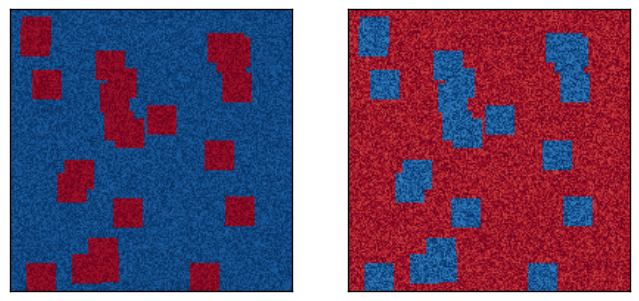

In [64]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [106]:
def ftcs(U, V, nt, Du, Dv, F, k, dt, delta):
   
    for n in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = Un[1:-1,1:-1] + dt *\
            (Du/delta**2 * (Un[2:,1:-1] + Un[:-2,1:-1] + Un[1:-1,2:] + Un[1:-1,:-2] -4*Un[1:-1,1:-1]) -\
            Un[1:-1,1:-1]*(Vn[1:-1,1:-1])**2 + F * (1-Un[1:-1,1:-1]))
            
        V[1:-1,1:-1] = Vn[1:-1,1:-1] + dt *\
            (Dv/delta**2 * (Vn[2:,1:-1] + Vn[:-2,1:-1] + Vn[1:-1,2:] + Vn[1:-1,:-2] -4*Vn[1:-1,1:-1]) +\
            Un[1:-1,1:-1]*(Vn[1:-1,1:-1])**2 - (F + k)*Vn[1:-1,1:-1])
  
        # Enforce Neumann BCs
        U[-1,:] = U[-2,:]
        U[:,-1] = U[:,-2]
        U[0,:] = U[1,:]
        U[:,0] = U[:,1]
        
        V[-1,:] = V[-2,:]
        V[:,-1] = V[:,-2]
        V[0,:] = V[1,:]
        V[:,0] = V[:,1]
        
        
    return U,V

In [96]:
ftcs(U,V,nt,Du,Dv,F,k,dt,dh)

(array([[ 0.95240393,  0.95240393,  0.94891616, ...,  0.98932024,
          0.99061544,  0.99061544],
        [ 0.95240393,  0.95240393,  0.94891616, ...,  0.98932024,
          0.99061544,  0.99061544],
        [ 0.94872314,  0.94872314,  0.94454883, ...,  0.9890645 ,
          0.99042336,  0.99042336],
        ..., 
        [ 0.95622777,  0.95622777,  0.95239656, ...,  0.99488881,
          0.99538486,  0.99538486],
        [ 0.95910378,  0.95910378,  0.95585264, ...,  0.99509444,
          0.99557349,  0.99557349],
        [ 0.95910378,  0.95910378,  0.95585264, ...,  0.99509444,
          0.99557349,  0.99557349]]),
 array([[  4.65087333e-04,   4.65087333e-04,   6.62203073e-04, ...,
           2.39368299e-05,   1.39084142e-05,   1.39084142e-05],
        [  4.65087333e-04,   4.65087333e-04,   6.62203073e-04, ...,
           2.39368299e-05,   1.39084142e-05,   1.39084142e-05],
        [  6.66030335e-04,   6.66030335e-04,   9.85165548e-04, ...,
           2.87133883e-05,   1.63095284e

In [97]:
U[100,::40]

array([ 0.92469521,  0.85013834,  0.66815621,  0.90196481,  0.9039502 ])

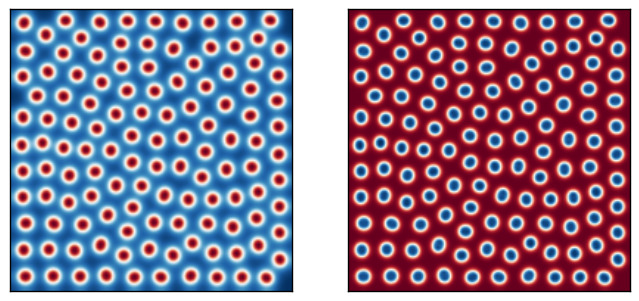

In [98]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

# Animation

In [99]:
from matplotlib import animation
from IPython.display import HTML

In [100]:
U.shape

(192, 192)

Fonction qui fait le même travail mais elle sauvegarde chaque pas nt effectué

In [213]:
def ilovemath(A, B, n, nt, Du, Dv, F, k, dt, delta):
   
    U = numpy.zeros((nt,n,n))
    V = numpy.zeros((nt,n,n))
    U[0] = A
    V[0] = B
    
    for t in range(nt-1):
        Un = U[t]
        Vn = V[t]
        
        U[t+1,1:-1,1:-1] = Un[1:-1,1:-1] + dt *\
            (Du/delta**2 * (Un[2:,1:-1] + Un[:-2,1:-1] + Un[1:-1,2:] + Un[1:-1,:-2] -4*Un[1:-1,1:-1]) -\
            Un[1:-1,1:-1]*(Vn[1:-1,1:-1])**2 + F * (1-Un[1:-1,1:-1]))
            
        V[t+1,1:-1,1:-1] = Vn[1:-1,1:-1] + dt *\
            (Dv/delta**2 * (Vn[2:,1:-1] + Vn[:-2,1:-1] + Vn[1:-1,2:] + Vn[1:-1,:-2] -4*Vn[1:-1,1:-1]) +\
            Un[1:-1,1:-1]*(Vn[1:-1,1:-1])**2 - (F + k)*Vn[1:-1,1:-1])
  
        # Enforce Neumann BCs
        U[t+1,-1,:] = U[t+1,-2,:]
        U[t+1,:,-1] = U[t+1,:,-2]
        U[t+1,0,:] = U[t+1,1,:]
        U[t+1,:,0] = U[t+1,:,1]
        
        V[t+1,-1,:] = V[t+1,-2,:]
        V[t+1,:,-1] = V[t+1,:,-2]
        V[t+1,0,:] = V[t+1,1,:]
        V[t+1,:,0] = V[t+1,:,1]
        
        
    return U

In [214]:
def animate(data):
    x = numpy.linspace(0,5,n)
    y = data
    line.set_data(x,y)
    return line,

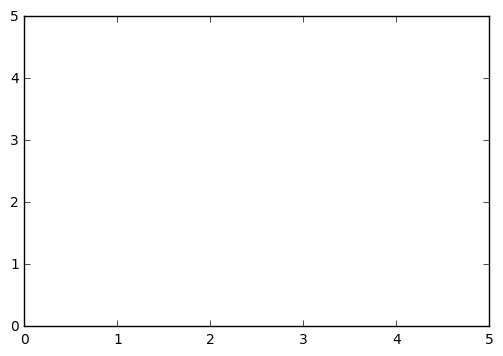

In [215]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,5),ylim=(0,5),xlabel=(''),ylabel=(''));
line, = ax.plot([],[],color='#003366', lw=2);

In [216]:
U = uvinitial['U']
V = uvinitial['V']

In [217]:
nt_1 = int((nt-1)/100)
dt_1 = nt_1/T

In [218]:
dt_1

0.010375

In [219]:
A = ilovemath(U, V, n, nt_1, Du, Dv, F, k, dt_1, dh)

In [220]:
A.shape

(83, 192, 192)

In [221]:
anim = animation.FuncAnimation(fig, animate, frames=A[:,0], interval=50)
HTML(anim.to_html5_video())

Je n'arrive pas à 'plot' mes données en 2 dimensions et donc j'ai un graphe de la concentration de U de x. Comment dois je faire ?

# Implicit Scheme

\begin{equation}
\frac{U^{n+1}_{i,j} - U^n_{i,j}}{\Delta t} = D_u \left( \frac{U^{n+1}_{i+1, j} - 2U^{n+1}_{i,j} + U^{n+1}_{i-1,j}}{\Delta x^2} + \frac{U^{n+1}_{i, j+1} - 2U^{n+1}_{i,j} + U^{n+1}_{i,j-1}}{\Delta y^2}\right) - U^{n+1}_{i,j}\left(V^{n+1}_{i,j}\right)^2 + F\left(1-U^{n+1}_{i,j}\right)\\
\frac{V^{n+1}_{i,j} - V^n_{i,j}}{\Delta t} = D_v \left( \frac{V^{n+1}_{i+1, j} - 2V^{n+1}_{i,j} + V^{n+1}_{i-1,j}}{\Delta x^2} + \frac{V^{n+1}_{i, j+1} - 2V^{n+1}_{i,j} + V^{n+1}_{i,j-1}}{\Delta y^2}\right) + U^{n+1}_{i,j}\left(V^{n+1}_{i,j}\right)^2 - \left(F+k\right)V^{n+1}_{i,j}
\end{equation}

Séparons tous ce que nous connaissons sur la droite sachant $\Delta x = \Delta y = \delta$

\begin{equation}
\frac{U^{n+1}_{i,j}}{\Delta t} - \frac{D_u}{\delta^2} \left( U^{n+1}_{i+1, j} + U^{n+1}_{i-1,j} + U^{n+1}_{i, j+1} + U^{n+1}_{i,j-1} - 4U^{n+1}_{i,j}\right) + U^{n+1}_{i,j}\left(V^{n+1}_{i,j}\right)^2 + U^{n+1}_{i,j}F = \frac{U^n_{i,j}}{\Delta t} + F\\
\frac{V^{n+1}_{i,j}}{\Delta t} - \frac{D_v}{\delta^2} \left( V^{n+1}_{i+1, j} + V^{n+1}_{i-1,j} + V^{n+1}_{i, j+1} + V^{n+1}_{i,j-1} - 4V^{n+1}_{i,j} \right) - U^{n+1}_{i,j}\left(V^{n+1}_{i,j}\right)^2 + \left(F+k\right)V^{n+1}_{i,j} = \frac{U^n_{i,j}}{\Delta t}
\end{equation}

Maintenant réunissons cela dans des 

Le but va être d'obtenir 2 équations solubles


\begin{equation}
[A][U^{n+1}_{int}] + [B][V^{n+1}_{i,j}]_{int} = [b] + [b]_{bords}\\
[C][U^{n+1}_{int}] + [D][V^{n+1}_{i,j}]_{int} = [d] + [b]_{bords}
\end{equation}

Où les matrices $[B]$ et $[D]$ sont des matrices unités

In [313]:
from scipy.linalg import solve